# **TRABAJO 1 ICD 2025**

**INTEGRANTES:**

**Grupo 1:**

Abad Aniceto Anguiela Brilletth

Meyli Yanely Robledo Jimenez

Alberto Sebastian Pizarro Otero (No trabajó)

Damaris Belen Navarro Lozada


---



# **MARCO TEÓRICO**

**1. Tipo de Cambio**

El tipo de cambio refleja el precio de la moneda nacional en relación con una divisa extranjera, siendo el dólar estadounidense la referencia principal en el Perú. En este análisis, se toma en cuenta el tipo de cambio interbancario - compra, que refleja el valor del sol peruano frente a otras monedas, como el dólar estadounidense. Las variaciones del tipo de cambio afectan directamente el comercio internacional y las decisiones empresariales, ya que influyen en el costo de las importaciones y las exportaciones.

La volatilidad en el tipo de cambio por ejemplo, puede generar incertidumbre en los empresarios, afectando su confianza y las decisiones de inversión. Un tipo de cambio inestable puede alterar los costos de producción, especialmente en sectores dependientes de las importaciones y también generar presiones inflacionarias.

Sus variaciones inciden directamente en:

* **Competitividad de las exportaciones**: Un tipo de cambio depreciado (más soles por dólar) favorece a los exportadores.
* **Costo de importaciones**: un tipo de cambio elevado encarece bienes importados y materias primas.
* **Inflación interna**: la depreciación del sol puede trasladarse a precios internos.
* **Expectativas empresariales y de inversión**: la volatilidad cambiaria puede generar incertidumbre y afectar decisiones de gasto e inversión.


 **2. Índices de Confianza Empresarial**

Los índices de confianza empresarial miden las expectativas de los empresarios sobre la economía, la demanda y su sector en el corto plazo (para este caso en 3 o 12 meses). Estos indices son indicadores clave para verificar la salud económica y el comportamiento futuro de las empresas. En este trabajo, se consideran tres variables principales:



* **Índice de expectativas de demanda a 3 meses (PD38047AM)**:Evalúa las expectativas sobre la demanda futura de productos y servicios. Un aumento en la demanda esperada está asociada a un entorno económico relativamente estable, mientras que la incertidumbre en la demanda puede estar vinculada con un tipo de cambio volátil.
* **Índice de expectativas de la economía a 3 meses (PD38045AM)**: Mide las expectativas generales de los empresarios sobre el futuro económico en el corto plazo.

  Aquellas expectativas pesimistas suelen reflejar temores sobre la estabilidad económica, y que pueden estar influenciadas por fluctuaciones en el tipo de cambio.
* **Índice de expectativas del sector a  meses (PD38046AM)**: Refleja las expectativas dentro de un sector específico. Factores como la competitividad y los costos de insumos (que dependen del tipo de cambio) son importantes para este indice.

  Estos indices suelen expresarse en una escala centrada en 50 puntos: valores superiores indican optimismo (confianza), mientras que cifras menores reflejan pesimismo.


Estos índices suelen expresarse en una escala centrada en 50 puntos: Valores superiores a 50 indican optimismo (confianza), mientras que cifras menores a 50 reflejan pesimismo.

**3. Tasa de Referencia de la Política Monetaria**

La tasa de referencia es el interés fijado por el banco central (BCRP) que influye sobre las tasas de interés en la economía. A través de esta variable, se regula la inflación y el crecimiento económico. Un aumento en la tasa de referencia puede estabilizar el tipo de cambio, sin embargo, puede aumentar los costos de financiamiento para las empresas así afectando su confianza y sus decisiones de inversión.


 **Relación entre Tipo de Cambio y Confianza Empresarial**

La volatilidad en el tipo de cambio influye directamente en la confianza empresarial. Un tipo de cambio inestable puede generar incertidumbre sobre los costos y la rentabilidad de las empresas, y como consecuencia reduce sus expectativas de crecimiento. A su vez, los índices de confianza empresarial, como los de la economía, la demanda y el sector, reflejan esta percepción.

Diversos estudios han mostrado que la confianza empresarial está estrechamente ligada al entorno macroeconómico. Una mayor estabilidad del tipo de cambio suele traducirse en expectativas positivas, al reducir la incertidumbre respecto a costos, ingresos y márgenes de ganancia.

Analizar conjuntamente la evolución del tipo de cambio y de los índices de confianza empresarial durante el periodo 2015 a 2025 nos permitirá comprender mejor:

* Cómo shocks originados en el mercado internacional (precios de materias primas, flujos de capitales, shocks externos como la pandemia de COVID-19) influyen en la confianza de los empresarios.
* El grado de exposición de la economía peruana a la volatilidad externa.
* El papel de las expectativas en la estabilidad macroeconómica, en tanto estas guían las decisiones de inversión, contratación y producción.

---

# **PARTE 2: DESCARGA DE DATOS**


**Conexión con API de BCRP**

In [ ]:
# 1. Importación de las librerías que necesitaremos
import requests  # La librería estándar en Python para hacer peticiones a la web
import pandas as pd
import numpy as np
import json # Import the json library to handle potential JSON decoding errors

# 2. Definimos los parámetros de nuestra consulta
codigos = 'PN01214PM-PD38045AM-PD38047AM-PD38046AM-PD04722MM' # Códigos de las series
formato = 'json' # Pedimos los datos en formato JSON
#Delimitamos nuestro periodo de años, desde enero del 2015 hasta julio del 2025 (son los datos más recientes)
periodo_inicial = '2015-01'
periodo_final = '2025-07'

# 3. Construimos la URL completa
url = f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigos}/{formato}/{periodo_inicial}/{periodo_final}"


# 4. Hacemos la petición GET a la web del BCRP
response = requests.get(url)

# 5. Verificamos que la petición fue exitosa.
if response.status_code == 200:
    print("¡Conexión exitosa con el API del BCRP!")
    # Convertimos la respuesta a un formato de diccionario de Python
    data = response.json()
else:
    print(f"Error al conectar con el API. Código de estado: {response.status_code}")
    data = None


¡Conexión exitosa con el API del BCRP!


# **Parte 3: Convertir a un DataFrame de Pandas**

A) Convertimos nuestros datos a un formato tabular que podamos analizar fácilmente


In [ ]:
if data:
    # Creamos listas para guardar las fechas y los valores
    fechas = []
    Tipo_Cambio_Compra = []
    Expectativas_Economia = []
    Expectativas_Demanda = []
    Expectativas_Sector = []
    Tasa_Interés =[]

    # Iteramos sobre cada periodo en los datos del BCRP
    for periodo in data['periods']:
        fechas.append(periodo['name'])

        # Los valores vienen en el mismo orden de la configuración
        try:
            Tipo_Cambio_Compra.append(float(periodo['values'][0]) if periodo['values'][0] != 'n.d.' else np.nan)
            Expectativas_Economia.append(float(periodo['values'][1]) if periodo['values'][1] != 'n.d.' else np.nan)
            Expectativas_Demanda.append(float(periodo['values'][2]) if periodo['values'][2] != 'n.d.' else np.nan)
            Expectativas_Sector.append(float(periodo['values'][3]) if periodo['values'][3] != 'n.d.' else np.nan)
            Tasa_Interés.append(float(periodo['values'][4]) if periodo['values'][4] != 'n.d.' else np.nan)
        except:
            Tipo_Cambio_Compra.append(np.nan)
            Expectativas_Economia.append(np.nan)
            Expectativas_Demanda.append(np.nan)
            Expectativas_Sector.append(np.nan)
            Tasa_Interés.append(np.nan)

    # DataFrame principal BCRP
    df_bcrp = pd.DataFrame({
        'Fecha': fechas,
        'Tipo_Cambio_Compra': Tipo_Cambio_Compra,
        'Expectativas_Economia': Expectativas_Economia,
        'Expectativas_Demanda': Expectativas_Demanda,
        'Expectativas_Sector': Expectativas_Sector,
        'Tasa_Interés': Tasa_Interés
    })

    print("DataFrame BCRP creado exitosamente:")
    display(df_bcrp.head())
else:
    print("No se pudieron cargar los datos para crear el DataFrame.")


DataFrame BCRP creado exitosamente:


,Fecha,Tipo_Cambio_Compra,Expectativas_Economia,Expectativas_Demanda,Expectativas_Sector,Tasa_Interés
0,Ene.2015,3.25,54.231975,55.799373,59.591195,3.0579
1,Feb.2015,3.25,50.157729,54.075235,57.165109,3.0928
2,Mar.2015,3.25,49.388379,54.103343,56.880734,3.0965
3,Abr.2015,3.25,46.742210,52.142857,57.768362,3.1263
4,May.2015,3.25,45.070423,50.566572,56.741573,3.1565


B) Verificamos si nuestra Base de Data posee los datos de todos los periodos.

In [ ]:
print("Número total de filas:", len(df_bcrp))
display(df_bcrp.tail())  # para ver las últimas filas

Número total de filas: 127


,Fecha,Tipo_Cambio_Compra,Expectativas_Economia,Expectativas_Demanda,Expectativas_Sector,Tasa_Interés
122,Mar.2025,4.75,53.934426,56.331169,62.418301,3.6705
123,Abr.2025,4.75,52.131148,55.081967,61.601307,3.6722
124,May.2025,4.50,53.965517,55.862069,61.631944,3.6246
125,Jun.2025,4.50,52.903226,55.161290,61.563518,3.5382
126,Jul.2025,4.50,54.545455,57.213115,62.131148,3.5851


# **PARTE 4: LIMPIEZA BÁSICA DE DATOS**

En esta sección realizamos una limpieza básica para preparar el dataset:
1. Convertimos la columna `Fecha` al formato `datetime` para facilitar análisis temporales.  
2. Identificamos valores faltantes (`NaN`) y verificamos la calidad de los datos.  
3. Guardamoa el dataset limpio en formato `.csv` para usarlo en trabajos posteriores.


In [ ]:
# Librería de necesaria:
import pandas as pd

# Diccionario de meses en español, necesario para poder graficar de manera mensual más adelante.
meses = {
    "Ene.": "Jan.", "Feb.": "Feb.", "Mar.": "Mar.", "Abr.": "Apr.",
    "May.": "May.", "Jun.": "Jun.", "Jul.": "Jul.", "Ago.": "Aug.",
    "Set.": "Sep.", "Oct.": "Oct.", "Nov.": "Nov.", "Dic.": "Dec."}

# 1. Reemplazamos los meses en la columna Fecha
df_bcrp['Fecha'] = df_bcrp['Fecha'].replace(meses, regex=True)

# 2. Convertimos a datetime
df_bcrp['Fecha'] = pd.to_datetime(
    df_bcrp['Fecha'],
    format='%b.%Y',
    errors='coerce')

# 3. Verificación
print(df_bcrp.info())
display(df_bcrp.head(12))


# 4. Verificación de la estructura
print("\nInformación general del dataset combinado:")
print(df_bcrp.info())

# Verificamos valores faltantes:
print("\nValores faltantes por columna:")
print(df_bcrp.isnull().sum())

# 5. Guardamos dataset final
df_bcrp.to_csv("dataset_bcrp_limpio.csv", index=False, encoding="utf-8-sig")
print("\nArchivo 'dataset_bcrp_limpio.csv' guardado correctamente.")

display(df_bcrp.head(12))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  127 non-null    datetime64[ns]
 1   Tipo_Cambio_Compra     127 non-null    float64       
 2   Expectativas_Economia  127 non-null    float64       
 3   Expectativas_Demanda   127 non-null    float64       
 4   Expectativas_Sector    127 non-null    float64       
 5   Tasa_Interés           127 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.1 KB
None


,Fecha,Tipo_Cambio_Compra,Expectativas_Economia,Expectativas_Demanda,Expectativas_Sector,Tasa_Interés
0,2015-01-01,3.25,54.231975,55.799373,59.591195,3.0579
1,2015-02-01,3.25,50.157729,54.075235,57.165109,3.0928
2,2015-03-01,3.25,49.388379,54.103343,56.880734,3.0965
3,2015-04-01,3.25,46.742210,52.142857,57.768362,3.1263
4,2015-05-01,3.25,45.070423,50.566572,56.741573,3.1565
5,2015-06-01,3.25,50.625000,53.271028,60.990712,3.1770
6,2015-07-01,3.25,46.719160,50.781250,57.180157,3.1897
7,2015-08-01,3.25,42.222222,48.039216,54.779412,3.2340
8,2015-09-01,3.50,43.222506,48.091603,55.867347,3.2212
9,2015-10-01,3.50,44.972067,49.305556,57.734807,3.2848



Información general del dataset combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  127 non-null    datetime64[ns]
 1   Tipo_Cambio_Compra     127 non-null    float64       
 2   Expectativas_Economia  127 non-null    float64       
 3   Expectativas_Demanda   127 non-null    float64       
 4   Expectativas_Sector    127 non-null    float64       
 5   Tasa_Interés           127 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.1 KB
None

Valores faltantes por columna:
Fecha                    0
Tipo_Cambio_Compra       0
Expectativas_Economia    0
Expectativas_Demanda     0
Expectativas_Sector      0
Tasa_Interés             0
dtype: int64

Archivo 'dataset_bcrp_limpio.csv' guardado correctamente.


,Fecha,Tipo_Cambio_Compra,Expectativas_Economia,Expectativas_Demanda,Expectativas_Sector,Tasa_Interés
0,2015-01-01,3.25,54.231975,55.799373,59.591195,3.0579
1,2015-02-01,3.25,50.157729,54.075235,57.165109,3.0928
2,2015-03-01,3.25,49.388379,54.103343,56.880734,3.0965
3,2015-04-01,3.25,46.742210,52.142857,57.768362,3.1263
4,2015-05-01,3.25,45.070423,50.566572,56.741573,3.1565
5,2015-06-01,3.25,50.625000,53.271028,60.990712,3.1770
6,2015-07-01,3.25,46.719160,50.781250,57.180157,3.1897
7,2015-08-01,3.25,42.222222,48.039216,54.779412,3.2340
8,2015-09-01,3.50,43.222506,48.091603,55.867347,3.2212
9,2015-10-01,3.50,44.972067,49.305556,57.734807,3.2848


Comprombamos que nuestra base de datos posee datos para todos los periodos del 2015 al 2025.



# **PARTE 5: ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

En esta sección realizamos un análisis exploratorio para identificar patrones, tendencias y relaciones entre nuestras variables principales.




**1. Resumen Estadístico**



In [ ]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico:")
display(df_bcrp.describe(include=[np.number]))


Resumen estadístico:


,Tipo_Cambio_Compra,Expectativas_Economia,Expectativas_Demanda,Expectativas_Sector,Tasa_Interés
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.753937,47.707358,50.710800,55.004505,3.525428
std,2.108887,9.281927,7.310490,7.274649,0.259132
min,0.250000,9.137055,15.736041,17.801046,3.057900
25%,2.750000,42.648013,46.730945,51.136150,3.292000
50%,3.500000,49.500000,51.405622,55.705708,3.469600
75%,4.875000,54.160485,55.924383,60.968329,3.742700
max,7.750000,64.142860,61.680912,64.617943,4.133600


Destaca que la media de nuestras variables de expectativas poseen un promedio muy cercano

El resumen estadístico nos muestra la media, desviación estándar, mínimos y máximos de cada variable, lo que nos permite identificar la escala de cada índice y el rango de variación del tipo de cambio.  
Por ejemplo, observamos que el **Tipo de Cambio de Compra** varía entre ~3.0 y ~4.1 soles por dólar en el periodo 2015-2025, lo cual refleja la relativa estabilidad cambiaria en el Perú.  
Mientras que por el lado de los **índices de expectativas** empresariales se osberva una variabilidad mayor, lo que podría reflejar la sensibilidad del sector empresarial frente a coyunturas económicas y políticas.


**2. Comparamos la evolución promedio de nuestras variables a lo largo del tiempo**

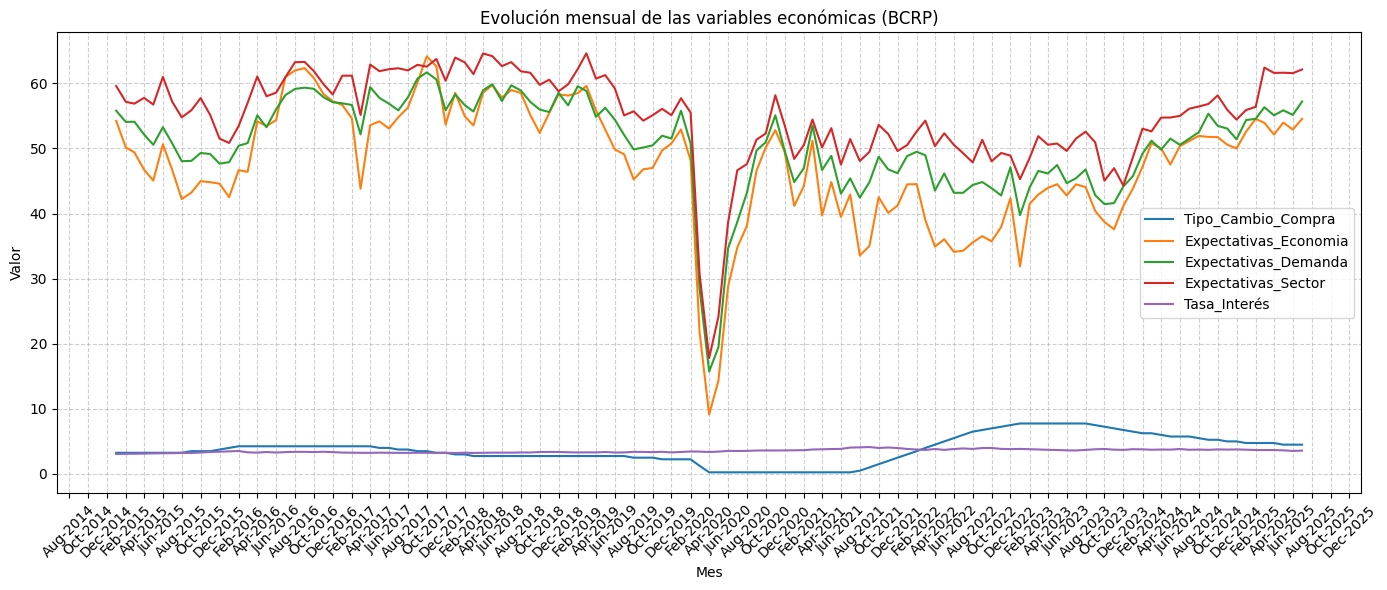

In [ ]:
# Importamos las librerías necesarias:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))

# Graficamos directamente cada columna numérica contra la fecha
for columna in df_bcrp.select_dtypes(include='number').columns:
    plt.plot(df_bcrp['Fecha'], df_bcrp[columna], label=columna)

# Nombramos el gráfico y los ejes.
plt.title("Evolución mensual de las variables económicas (BCRP)")
plt.xlabel("Mes")
plt.ylabel("Valor")

# --- Formato del X ---
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))   # ticks cada 2 meses, por temas de espacio
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La **evolución mensual de las variables económicas** entre 2015 y 2025 muestra patrones claros y algunos episodios críticos. El tipo de cambio se mantiene relativamente estable hasta 2019, pero en 2020 se observa un salto abrupto, coincidiendo con la crisis por el Covid-19. De forma paralela, las expectativas de demanda y de sector se desploman ese mismo año, lo que refleja el fuerte impacto de la pandemia en la confianza empresarial.

Tras esa caída, tanto **el tipo de cambio** como las **expectativas** experimentan una recuperación gradual, aunque con episodios de volatilidad asociados a la incertidumbre política y económica en 2021–2022. La tasa de interés, por su parte, se mantiene estable durante gran parte del periodo, pero muestra un incremento moderado desde 2021 en adelante, lo que coincide con la estrategia del BCRP para controlar la inflación y estabilizar el mercado cambiario.

En conjunto, el gráfico evidencia cómo los shocks externos (pandemia) y factores internos (incertidumbre política) afectaron simultáneamente la confianza empresarial y el tipo de cambio, mientras que la política monetaria buscó contener esos efectos a través de ajustes graduales en la tasa de interés.


**Gráficos de Series Temporales**

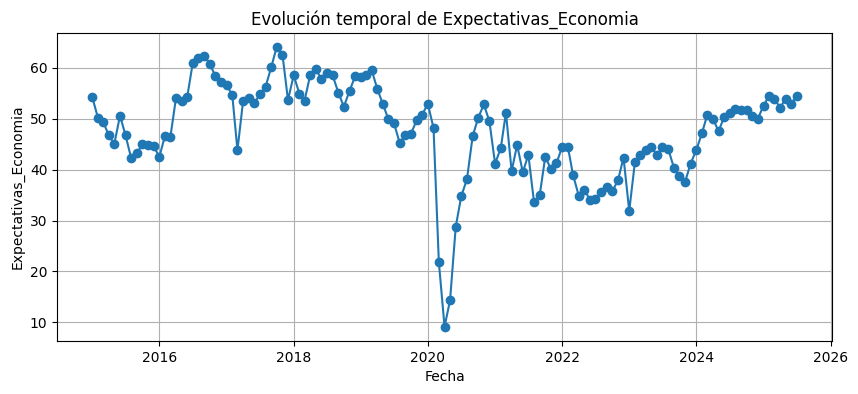

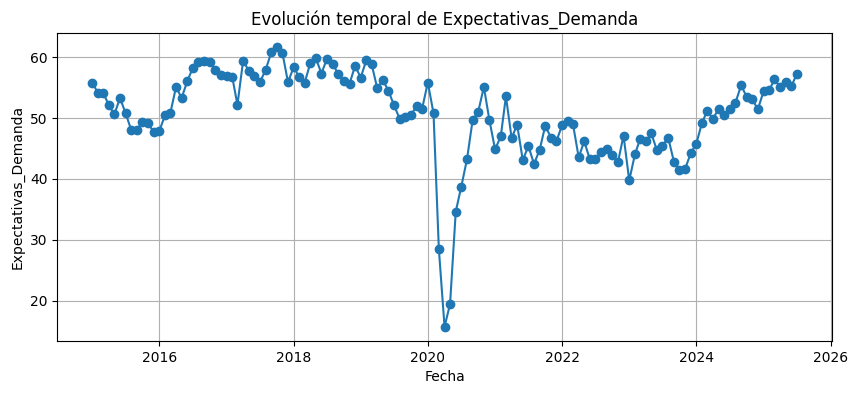

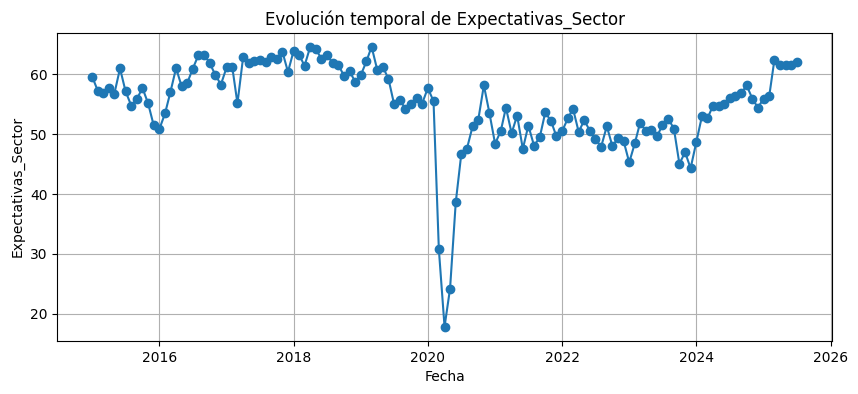

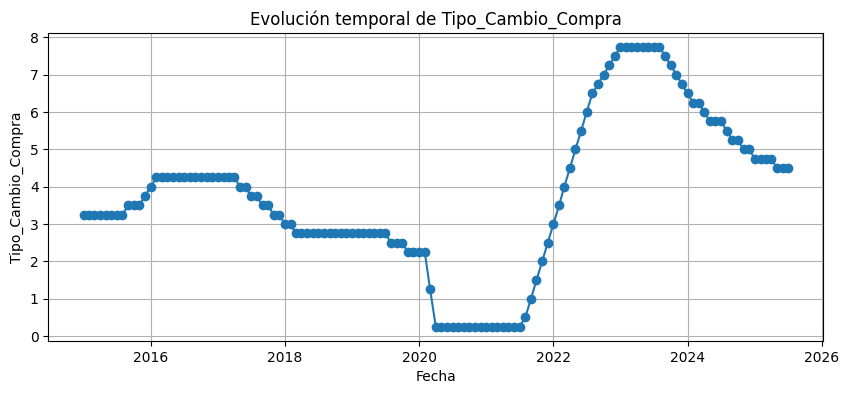

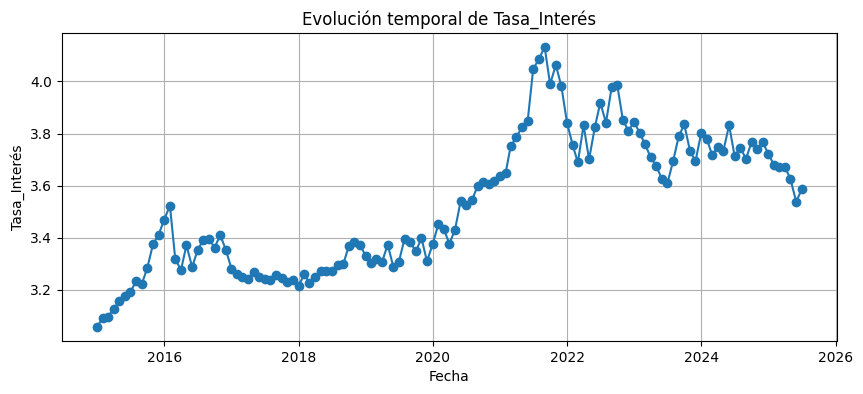

In [ ]:
import matplotlib.pyplot as plt

# Definimos lista de variables a graficar
variables = ['Expectativas_Economia','Expectativas_Demanda',
             'Expectativas_Sector', 'Tipo_Cambio_Compra', 'Tasa_Interés']

# Graficamos cada serie en el tiempo
for var in variables:
    plt.figure(figsize=(10,4))
    plt.plot(df_bcrp['Fecha'], df_bcrp[var], marker='o', linestyle='-')
    plt.title(f"Evolución temporal de {var}")
    plt.xlabel("Fecha")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


De los gráficos mostrados tenemos lo siguiente:
1. Expectativas de Economía
Entre 2015 y 2019 se mantuvieron en niveles relativamente altos, con picos por encima de 60. Sin embargo, en 2020 sufren una caída abrupta hasta valores mínimos cercanos a 10, reflejando el fuerte golpe de la pandemia. A partir de 2021 se inicia una recuperación gradual, aunque con altibajos, alcanzando en 2025 niveles en torno a 55, aún con cierto rezago frente a los valores pre-Covid.

2. Expectativas de Demanda
La demanda se sostuvo alrededor de 55–60 hasta 2019, para luego desplomarse en 2020 a niveles mínimos de 15. Posteriormente, se recupera de manera paulatina, alcanzando en 2025 niveles cercanos a los registrados en el inicio del periodo.

3. Expectativas de Sector
La confianza sectorial siguió una dinámica muy similar a la demanda: alta y estable hasta 2019, colapso en 2020, y recuperación constante en los años posteriores. Para 2025 ya se sitúa en niveles incluso superiores a los de 2015.

4. Tipo de Cambio
Se mantuvo estable alrededor de 3 soles por dólar hasta 2017, pero posteriormente comenzó una senda alcista. Entre 2021 y 2023 se da una depreciación pronunciada, superando los 7 soles por dólar. Desde 2024 se aprecia una corrección hacia 5 soles, aunque sin regresar a los niveles iniciales.

5. Tasa de Interés
La TPM se mantuvo estable y baja hasta 2019. Desde 2021, frente a presiones inflacionarias y cambiarias, el BCRP elevó gradualmente la tasa hasta un máximo cercano a 4,2 %, para luego reducirla hacia 3,6 % en 2025, buscando un equilibrio entre control de inflación y estímulo a la economía.

El análisis temporal revela cómo las expectativas empresariales, el tipo de cambio y la política monetaria se entrelazan frente a los shocks externos e internos. La pandemia de 2020 marca un punto de quiebre: las expectativas se desploman, el tipo de cambio se dispara y la política monetaria responde con ajustes graduales en la tasa de interés.

En los años siguientes, las expectativas de demanda, sector y economía logran recuperarse, aunque con volatilidad, mientras que el tipo de cambio permanece elevado respecto al inicio del periodo, evidenciando tensiones estructurales en la economía peruana. La tasa de interés, por su parte, refleja el esfuerzo del BCRP por contener la inestabilidad cambiaria sin frenar en exceso la recuperación.

En conjunto, los gráficos muestran que los shocks externos (Covid-19) y la incertidumbre política interna impactaron simultáneamente la confianza empresarial y la estabilidad cambiaria, obligando a la política monetaria a actuar como amortiguador en un contexto de alta volatilidad como el peruano.

**Scatterplots**

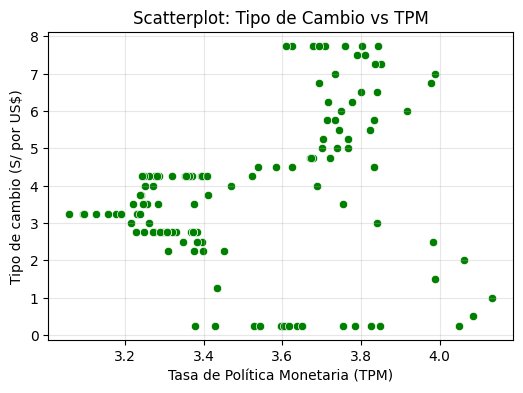

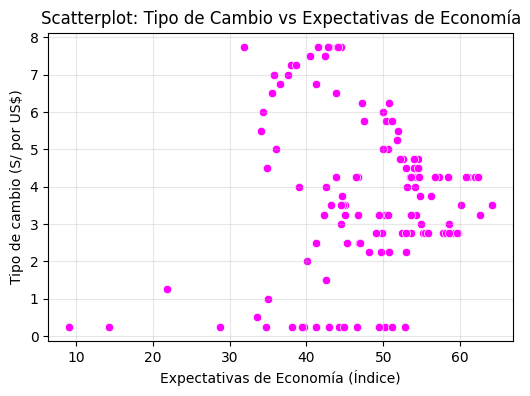

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tipo de cambio vs TPM
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_bcrp,
    x="Tasa_Interés",  # tu proxy de TPM en df_bcrp
    y="Tipo_Cambio_Compra",
    color="green"
)
plt.title("Scatterplot: Tipo de Cambio vs TPM")
plt.xlabel("Tasa de Política Monetaria (TPM)")
plt.ylabel("Tipo de cambio (S/ por US$)")
plt.grid(True, alpha=0.3)
plt.show()

# 2. Tipo de cambio vs Expectativas de Economía
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_bcrp,
    x="Expectativas_Economia",
    y="Tipo_Cambio_Compra",
    color="magenta"
)
plt.title("Scatterplot: Tipo de Cambio vs Expectativas de Economía")
plt.xlabel("Expectativas de Economía (Índice)")
plt.ylabel("Tipo de cambio (S/ por US$)")
plt.grid(True, alpha=0.3)
plt.show()


El gráfico muestra la relación entre **la tasa de política monetaria** (TPM) y **el tipo de cambio**. Se observa que, en niveles bajos de la TPM (cerca de 3,2 %), el tipo de cambio se mantiene relativamente alto, alrededor de 60. A medida que la TPM sube hacia valores cercanos a 3,8 % y 4 %, el tipo de cambio tiende a estabilizarse en un rango más bajo, cercano a 50. Aunque la dispersión de los puntos revela que no hay una correlación lineal fuerte, sí se aprecia que los ajustes de la política monetaria del BCRP buscan contener la depreciación del sol. Los valores atípicos hacia abajo (cercanos a 20 o 30) podrían deberse a registros anómalos o momentos específicos de fuerte corrección cambiaria. En conjunto, el gráfico sugiere que **la TPM** actúa como un mecanismo de anclaje del **tipo de cambio**, aunque con efectos limitados en presencia de shocks externos.

**Matriz de correlación**

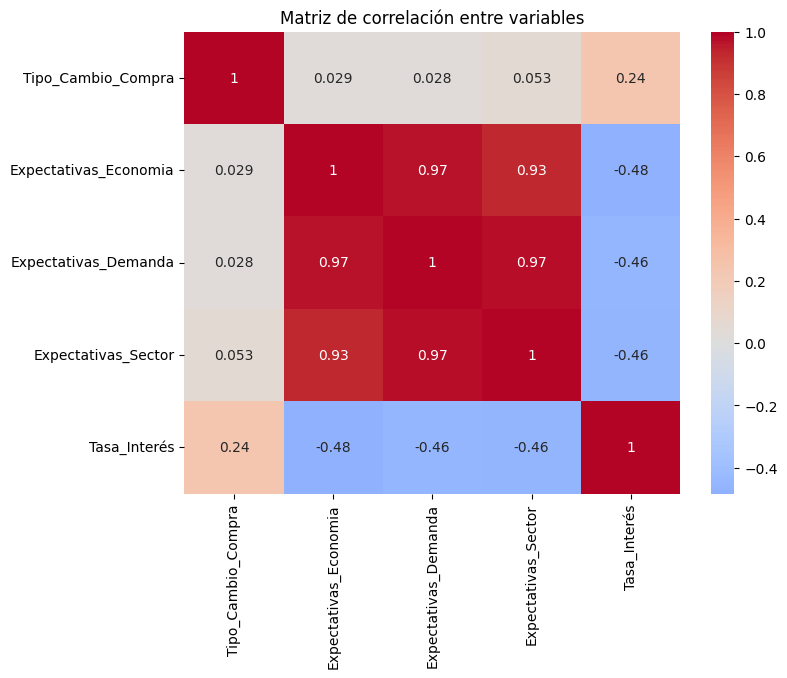

In [ ]:
import seaborn as sns

# Calculamos la matriz de correlación
corr = df_bcrp.select_dtypes(include=['number']).corr()

# Graficamos el heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables")
plt.show()


La matriz de correlación nos permite ver las relaciones entre variables:

- Se observa que las expectativas empresariales poseen un alto nivel de correlación, es decir se mueven casi juntas. Si una expectativa mejora, las demás también lo hacen. Esto es debido a que reaccionan frente a los mismos factores y puede ser redundante incluirlas todas en un modelo econométrico porque aportan información muy similar y podrían aportar unriesgo de multicolinealidad.

- Tambien se destaca un correlación negativa entre la tasa de interés y las expectativas empresariales, es decir, si la tasa de interés aumenta, las empresas serán más prudentes en sus desiciones económicas, disminuyendo su demanda y perspectivas de econmía. Esto es evidencia de la efectividad del mecanismo de la tasa de referencia de economía que

- El **Tipo de Cambio** muestra una correlación negativa moderada con las expectativas empresariales: cuando sube el dólar, la confianza empresarial tiende a caer.  
- Entre los **índices de confianza** (Economía, Sector, Demanda, Situación del Negocio), encontramos correlaciones positivas fuertes, lo cual es lógico ya que todos miden percepciones similares de los empresarios.  
- La variable **Ventas respecto al mes anterior** tiene correlaciones más débiles, lo que indica que es un indicador más volátil y sensible a factores de corto plazo.  

Esto sugiere que el **Tipo de Cambio** y las **Expectativas de la Economía/Sector** serán buenas variables para un futuro modelo de regresión lineal.


**Histograma y Botxplot**


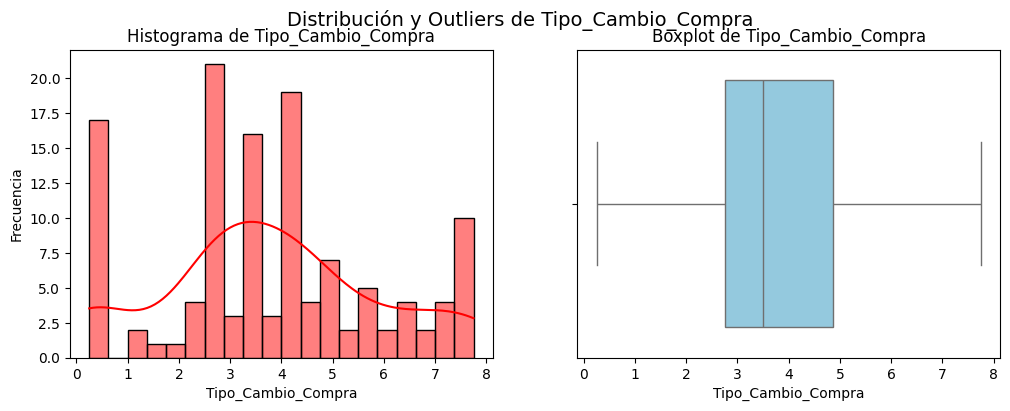

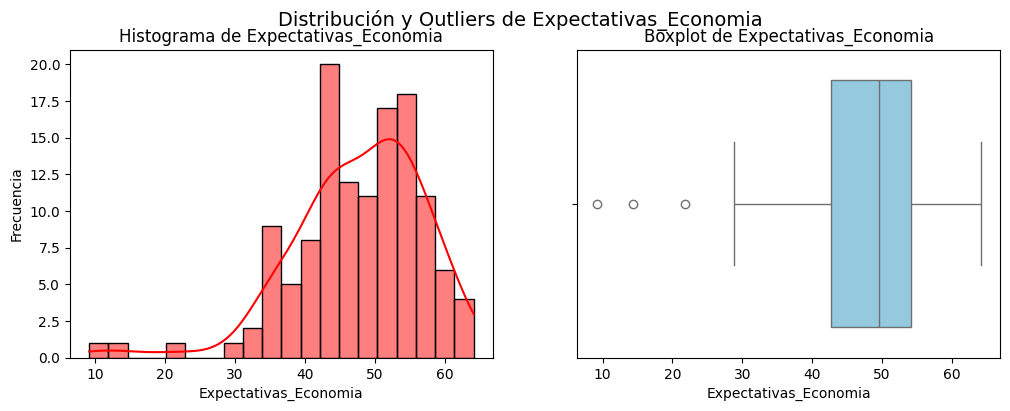

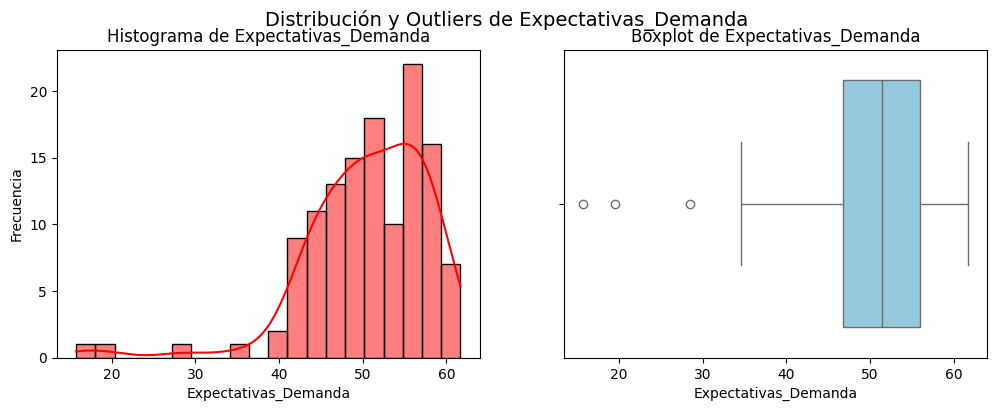

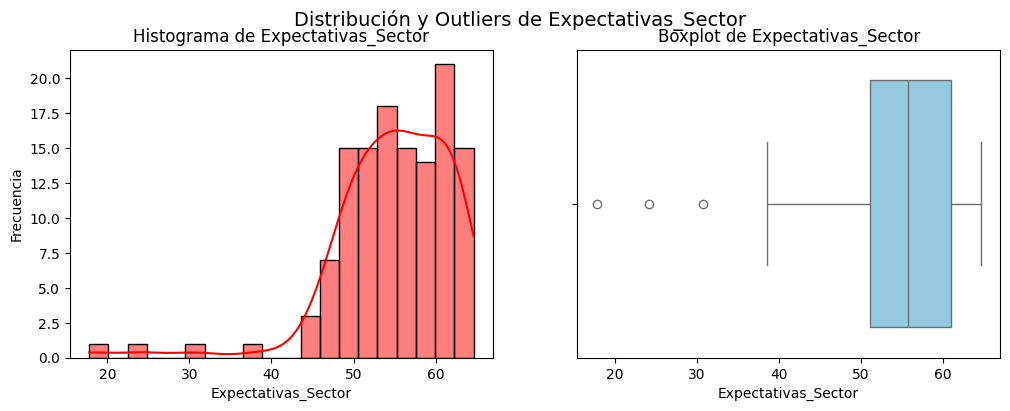

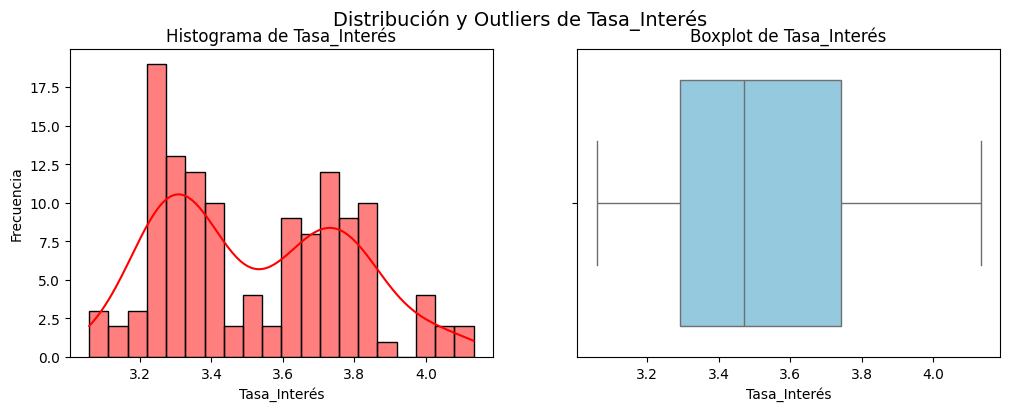

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las variables numéricas de df_bcrp
vars_focus = df_bcrp.select_dtypes(include="number").columns

for var in vars_focus:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(df_bcrp[var].dropna(), bins=20, kde=True, ax=axes[0], color="red", edgecolor="black")
    axes[0].set_title(f"Histograma de {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel("Frecuencia")

    # Boxplot
    sns.boxplot(x=df_bcrp[var].dropna(), ax=axes[1], color="skyblue")
    axes[1].set_title(f"Boxplot de {var}")
    axes[1].set_xlabel(var)

    plt.suptitle(f"Distribución y Outliers de {var}", fontsize=14)
    plt.show()



Las **expectativas empresariales** sobre la economía se concentran entre valores de 3 y 5, lo que refleja que, en la mayoría de meses, las percepciones se mantuvieron en un nivel neutral a optimista. La mediana cercana a 4 confirma esta tendencia de confianza moderada. Sin embargo, el histograma muestra episodios en los que las expectativas cayeron a valores cercanos a 0 o subieron hasta 7 u 8, lo que evidencia momentos de fuerte pesimismo u optimismo inusual. Estos episodios, aunque poco frecuentes, sugieren que la confianza empresarial es sensible a coyunturas específicas, posiblemente crisis externas, cambios de política económica o periodos de recuperación acelerada. En conjunto, la distribución señala una **estabilidad relativa** con brotes ocasionales de volatilidad en la percepción de los empresarios sobre la economía.

# **Efecto de la Pandemia en las expectativas empresariales**

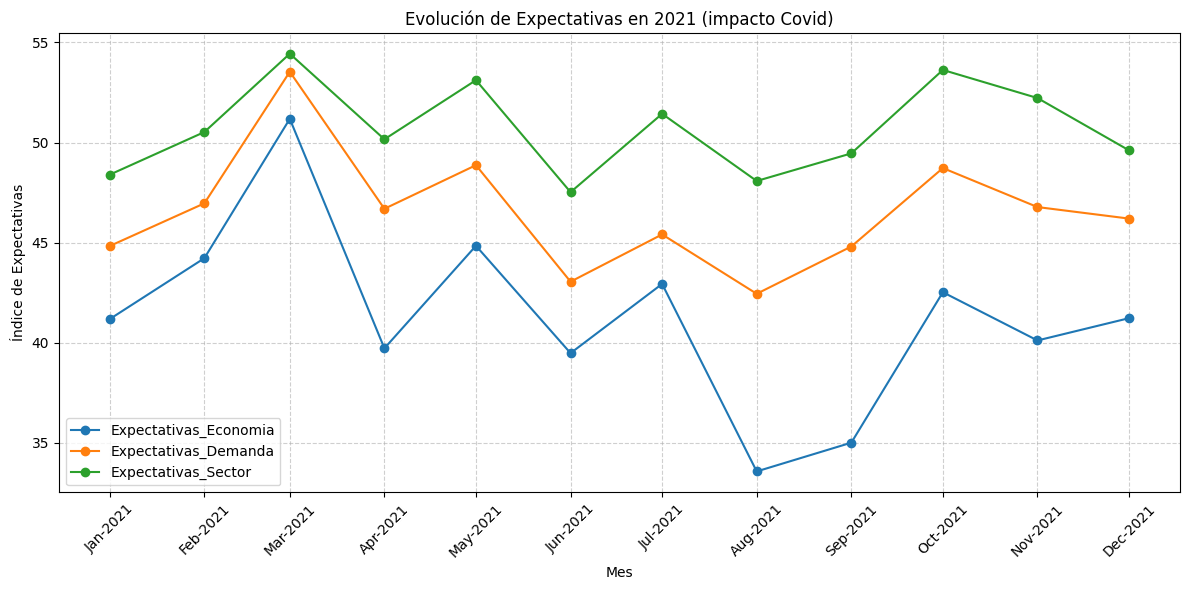

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Filtrar solo 2021 ---
df_2021 = df_bcrp[(df_bcrp['Fecha'].dt.year == 2021)]

# --- Variables de expectativas ---
expectativas = ['Expectativas_Economia','Expectativas_Demanda','Expectativas_Sector']

plt.figure(figsize=(12,6))

# Graficar cada expectativa
for var in expectativas:
    plt.plot(df_2021['Fecha'], df_2021[var], marker='o', label=var)

# --- Formato ---
plt.title("Evolución de Expectativas en 2021 (impacto Covid)")
plt.xlabel("Mes")
plt.ylabel("Índice de Expectativas")

# Mostrar todos los meses de 2021
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



En 2021, **las expectativas empresariales** reflejaron con claridad el impacto del Covid-19. Durante los primeros meses, tanto las expectativas de demanda como las del sector se mantuvieron en niveles relativamente altos, alcanzando un pico en marzo. Sin embargo, a partir de abril se observa una caída marcada, coincidiendo con la segunda ola de la pandemia en Perú. En los meses siguientes, las expectativas fluctuaron, sin recuperar de forma sostenida los niveles iniciales.

Por su parte, las expectativas sobre la economía se mantuvieron muy bajas en comparación con las demás variables, aunque hacia finales de año muestran una ligera recuperación. Esto sugiere que, pese a la reactivación parcial, prevalecía la incertidumbre sobre el rumbo de la economía en el mediano plazo. En conjunto, el gráfico evidencia **cómo los shocks sanitarios deterioraron la confianza empresarial y retrasaron la recuperación de expectativas en 2021**.

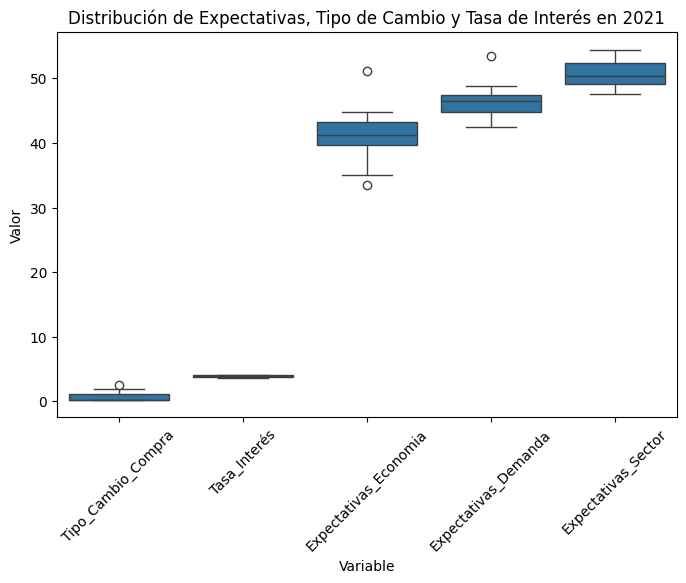

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Paso 1: Derretir el DataFrame ---
df_melt = df_bcrp.melt(
    id_vars=["Fecha"],
    value_vars=["Expectativas_Economia", "Expectativas_Demanda",
                "Expectativas_Sector", "Tipo_Cambio_Compra", "Tasa_Interés"],
    var_name="Variable",
    value_name="Valor"
)

# --- Paso 2: Filtrar solo 2021 ---
df_2021 = df_melt[df_melt["Fecha"].dt.year == 2021]

# --- Paso 3: Definir el orden por mediana ---
order_vars = df_2021.groupby("Variable")["Valor"].median().sort_values().index

# --- Paso 4: Hacer el boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df_2021,
            x='Variable',
            y='Valor',
            order=order_vars)
plt.title('Distribución de Expectativas, Tipo de Cambio y Tasa de Interés en 2021')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


El gráfico muestra **la distribución de las expectativas**, el tipo de cambio y la tasa de interés en 2021. Se observa una fuerte diferencia de escala: mientras las expectativas de economía se mantienen en valores muy bajos, con presencia de outliers hacia arriba, las expectativas de demanda y sector se ubican en niveles más altos y estables, aunque también presentan algunos valores atípicos que reflejan episodios de mayor incertidumbre.

**La tasa de interés** se mantiene muy concentrada en un rango estrecho, lo que evidencia la estabilidad de la política monetaria en ese año. En contraste, **el tipo de cambio** aparece en niveles elevados y con menor dispersión, confirmando que, pese a la volatilidad del contexto, la moneda se mantuvo relativamente estable en torno a un rango alto. En conjunto, el boxplot revela que el 2021 se vio marcado por la fragilidad de la confianza en la economía, contrastando con una política monetaria estable y un tipo de cambio controlado dentro de márgenes estrechos.

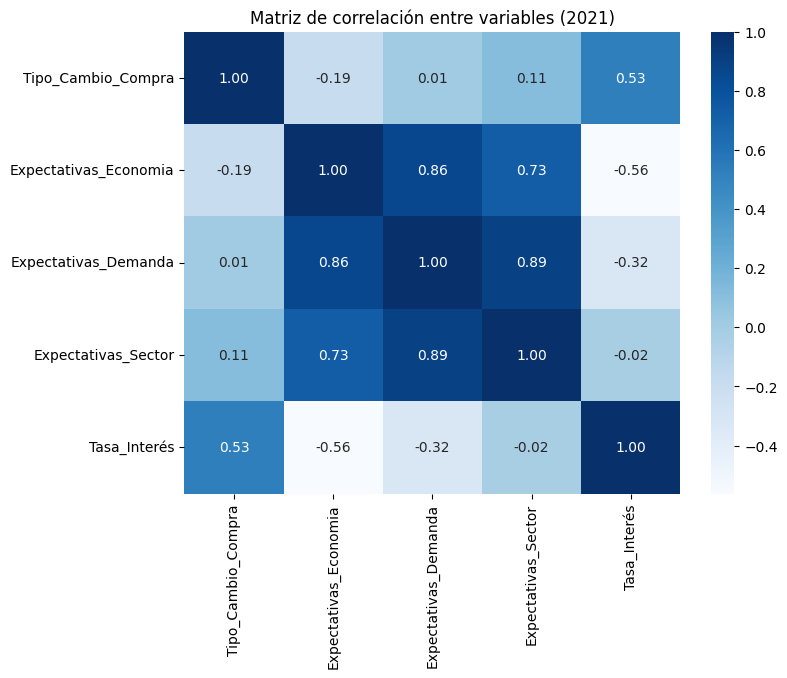

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the original df_bcrp for the year 2021
df_bcrp_2021 = df_bcrp[df_bcrp['Fecha'].dt.year == 2021]

# Calculate the correlation matrix on the filtered DataFrame
corr = df_bcrp_2021[["Tipo_Cambio_Compra","Expectativas_Economia", "Expectativas_Demanda",
                "Expectativas_Sector", "Tasa_Interés"]].corr()

# Graficar Heatmap de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación entre variables (2021)")
plt.show()


La matriz de correlación muestra relaciones interesantes entre las variables en 2021. Las expectativas de demanda y las expectativas sectoriales tienen una correlación muy alta (0.86), lo que indica que ambas se mueven prácticamente en conjunto. Asimismo, el tipo de cambio presenta una fuerte correlación positiva con estas dos variables (0.73 y 0.89), sugiriendo que cuando el dólar sube, la percepción empresarial tiende a deteriorarse.

Por otro lado, la tasa de interés muestra una correlación negativa con las expectativas de demanda (-0.56) y de sector (-0.32), lo que refleja el efecto contractivo de la política monetaria: tasas más altas suelen reducir la confianza. Sin embargo, con las expectativas de economía aparece una correlación positiva moderada (0.53), lo que puede responder a que, en ciertos periodos, los aumentos de la tasa se interpretan como señales de control frente a la inestabilidad.

En conjunto, el mapa evidencia que **el tipo de cambio es un factor central que afecta directamente las expectativas empresariales**, mientras que la tasa de interés cumple un rol más complejo, con efectos diferenciados según el horizonte de confianza analizado.